# 막대 그래프

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 1. 데이터 전처리

In [2]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\시도별 전출입 인구수.xlsx',
                    engine = 'openpyxl' )
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [3]:
# 결측치 확인
df.isnull().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [4]:
# '전출지별' 컬럼에 NaN 값 존재 (엑셀 양식에서 셀이 병합된 부분)
# 누락값(NaN)을 앞 데이터로 채움 

df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리하기 위해 데이터프레임 재구성

# 전출지가 서울이고, 전입지는 서울이 아닌 지역인 데이터만 추출
filtering = ( df['전출지별'] == '서울특별시' ) & ( df['전입지별'] != '서울특별시' ) 
df_seoul = df[ filtering ]

# '전출지별' 컬럼은 필요 없으므로 삭제
df_seoul = df_seoul.drop( '전출지별', axis = 1)

# '전입지별' 컬럼이름을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)

# 전입지를 기준으로 행 데이터를 선택할수 있도록 인덱스 지정
df_seoul.set_index('전입지', inplace=True)

df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


## 2. 시각화

### 막대 그래프 그리기

In [6]:
# 연도별로 정리하기 쉽도록 행렬 전치 수행
df_seoul_T = df_seoul.T

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
df_T1 = df_seoul_T[ ['충청남도','경상북도', '강원도', '전라남도'] ]

# 2010~2017년 데이터만 선택
df_T1 = df_T1.loc['2010':'2017']

df_T1

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


In [7]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
# 이 과정을 생략해도 인덱스를 정수형으로 인식하여 x축에 표시 하는듯 함.
# df_T.index = df_T.index.map(int)

In [8]:
# 스타일 서식 지정
plt.style.use('ggplot') 

#### 세로형 막대그래프

<AxesSubplot:>

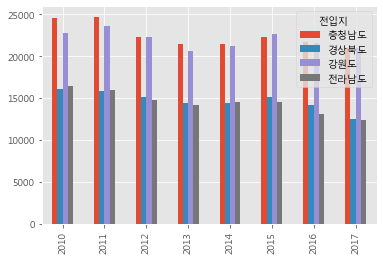

In [21]:
df_T1.plot.bar()

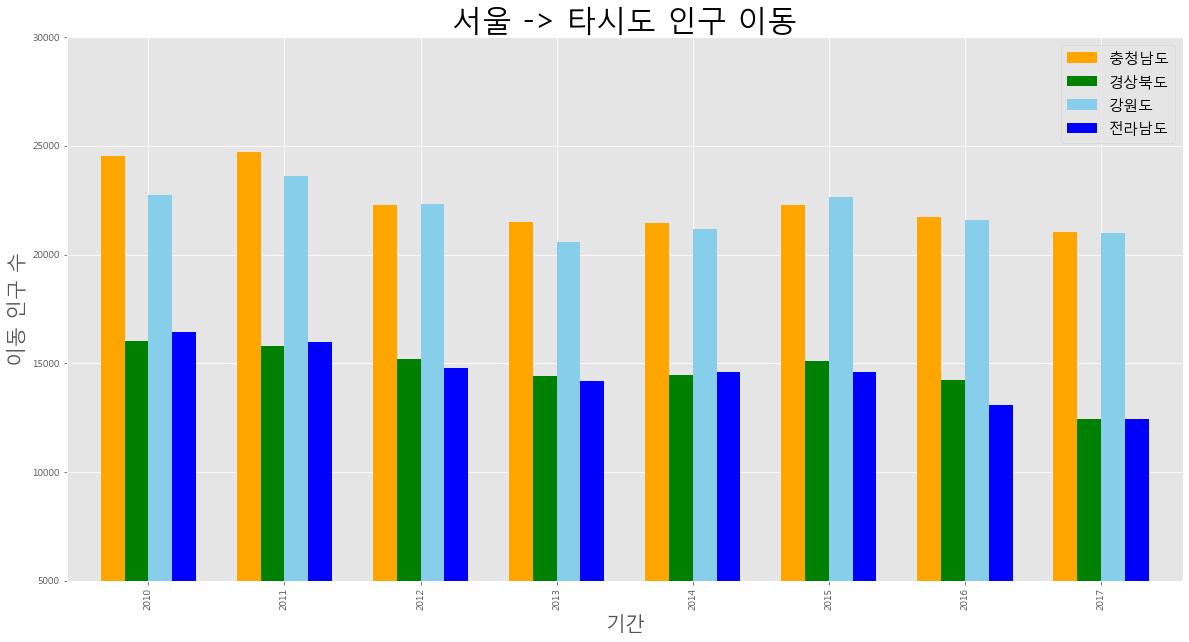

In [9]:
# 면적 그래프 그리기
df_T1.plot( kind='bar',  # 면적 그래프를 출력하는 옵션
           figsize=(20, 10),  # 그래프 프레임 사이즈
           width=0.7,  # 막대 그래프의 폭
           color = ['orange', 'green', 'skyblue', 'blue'] )  # 그래프 컬러
           

plt.title( '서울 -> 타시도 인구 이동', size=30 )
plt.ylabel( '이동 인구 수', size=20 )
plt.xlabel( '기간', size=20 )

# y축 범위 조정
plt.ylim(5000, 30000)

plt.legend( loc='best', fontsize=15 )

plt.show()

#### 가로형 막대그래프

In [10]:
# 데이터 프레임 복사 후, '합계' 컬럼 추가

df_T2 = pd.DataFrame(df_T1)
df_T2.loc['합계'] = df_T2.sum( axis=0 )

df_3 = df_T2.T

df_3

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


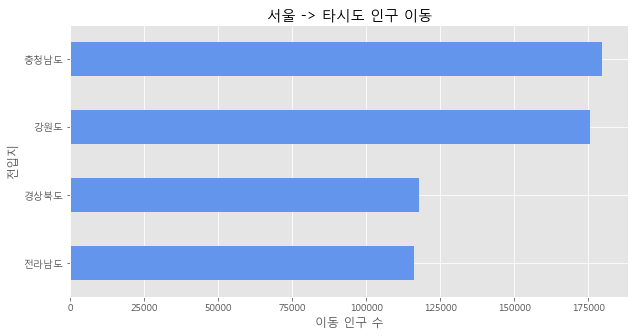

In [11]:
# 오름차순 정렬
df_3_sort = df_3.sort_values( by = '합계' )

# 수평 막대 그래프 그리기
df_3_sort['합계'].plot( kind='barh',
                        color='cornflowerblue', width=0.5, figsize=(10, 5) )

plt.title( '서울 -> 타시도 인구 이동' )
plt.ylabel( '전입지' )
plt.xlabel( '이동 인구 수' )

plt.show()

#### 보조 축 활용

In [12]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( 'C:\\Users\\Administrator\\GitHub\\TIL\\Python\\source_판다스 데이터 분석\\part4\\남북한발전전력량.xlsx',
                    engine= 'openpyxl' )
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [16]:
df2 = df.loc[5:9]
df2.drop('전력량 (억㎾h)', axis=1, inplace = True )
df2.set_index('발전 전력별', inplace=True)
df2

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [17]:
df2_T = df2.T 
df2_T

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


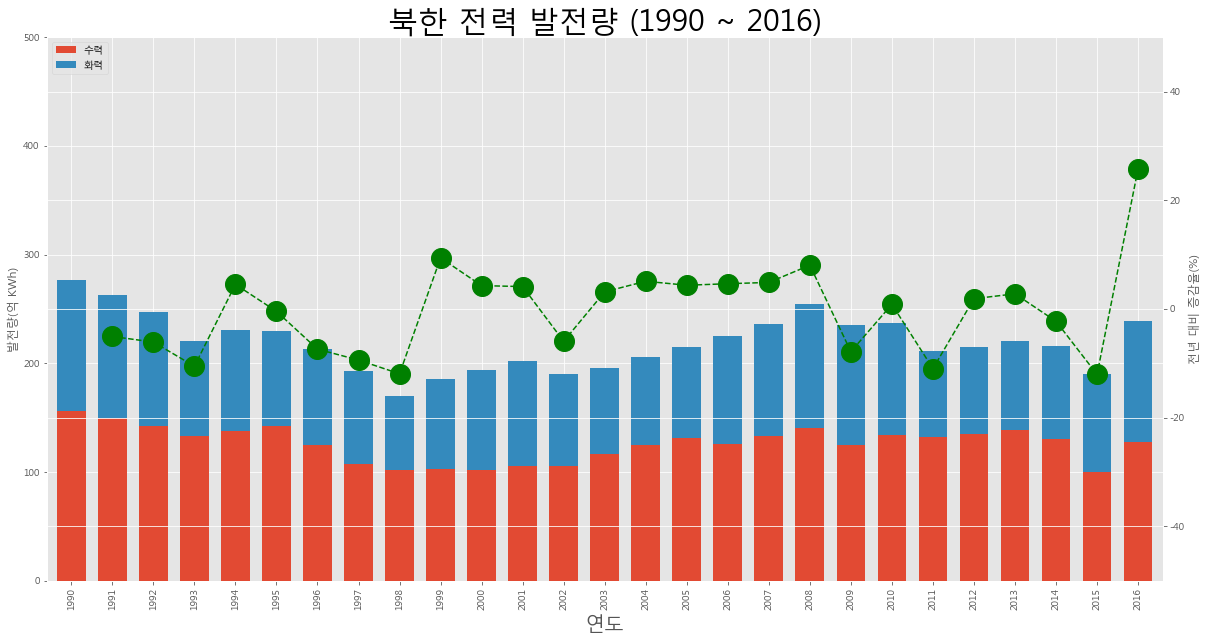

In [20]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 마이너스 부호 출력 설정
plt.rcParams['axes.unicode_minus']=False   



# 증감율(변동률) 계산
df2_T = df2_T.rename(columns={'합계':'총발전량'})
df2_T['총발전량 - 1년'] = df2_T['총발전량'].shift(1)
df2_T['증감율'] = ( ( df2_T['총발전량'] / df2_T['총발전량 - 1년'] ) - 1 ) * 100      


# 2축 그래프 그리기
ax1 = df2_T[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot( df2_T.index, df2_T.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()